In [ ]:
#CMT307 Coursework 1 Data Description
#Priyanka Magar
#22074213

>[Imports](#scrollTo=HgWLE8zsqCRJ)

>[Data Exploration and Preprocessing](#scrollTo=5K-boQaUqN5P)

>[Model Implementation](#scrollTo=U-M2UL-9qhOx)



# Imports

In [1]:
# importing the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression

#Data Exploration and Preprocessing

##Initial Exploration

In [2]:
#loading data
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Machine Learning Deffered/CW1_data_202223.csv'
data = pd.read_csv(path)

#overview of the data
print(data)

Mounted at /content/drive
            id  Gender   Age  HasDrivingLicense  RegionID  Switch VehicleAge  \
0       332804  Female  39.0                1.0      15.0     0.0   1-2 Year   
1       116249    Male  38.0                1.0      11.0     NaN   1-2 Year   
2       255006    Male  22.0                1.0      30.0     NaN   < 1 Year   
3       317475  Female  23.0                1.0       NaN     NaN   < 1 Year   
4       344213    Male  56.0                1.0      48.0     0.0  > 2 Years   
...        ...     ...   ...                ...       ...     ...        ...   
304882  259179  Female  24.0                1.0      36.0     NaN        NaN   
304883  365839    Male   NaN                1.0      35.0     NaN   1-2 Year   
304884  131933  Female  22.0                1.0       2.0     0.0   < 1 Year   
304885  146868    Male  44.0                1.0      32.0     NaN   1-2 Year   
304886  121959  Female  27.0                1.0      37.0     0.0   < 1 Year   

       PastAc

In [3]:
#printing information about the data such as the shape, info and column names to explore
print("The shape of the dataset is: ", data.shape, "\n\n")
print(data.info(), "\n\n")
print('Column names: ', data.columns, "\n\n\n")

#printing the description of the data
print('Data description: \n\n', data.describe())

The shape of the dataset is:  (304887, 12) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 304887 non-null  int64  
 1   Gender             274460 non-null  object 
 2   Age                274339 non-null  float64
 3   HasDrivingLicense  274399 non-null  float64
 4   RegionID           274334 non-null  float64
 5   Switch             152557 non-null  float64
 6   VehicleAge         274446 non-null  object 
 7   PastAccident       152422 non-null  object 
 8   AnnualPremium      304887 non-null  object 
 9   SalesChannelID     304887 non-null  int64  
 10  DaysSinceCreated   304887 non-null  int64  
 11  Result             304887 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 27.9+ MB
None 


Column names:  Index(['id', 'Gender', 'Age', 'HasDrivingLicense', 'RegionID', 'Switch'

In [4]:
#changing the format of AnnualPremium to a float type with no symbols
data['AnnualPremium'] = data['AnnualPremium'].replace({'£':''}, regex=True)
data['AnnualPremium'] = data['AnnualPremium'].replace({',':''}, regex=True)
data['AnnualPremium'] = pd.to_numeric(data['AnnualPremium'], downcast="float")

#changing category for Gender 0 for female 1 for male
data['Gender'] = data['Gender'].replace({'Female':'0'}, regex=True)
data['Gender'] = data['Gender'].replace({'Male':'1'}, regex=True)

#changing category for VehicalAge
data['VehicleAge'] = data['VehicleAge'].replace({'< 1 Year':'0'}, regex=True)
data['VehicleAge'] = data['VehicleAge'].replace({'1-2 Year':'1'}, regex=True)
data['VehicleAge'] = data['VehicleAge'].replace({'> 2 Years':'2'}, regex=True)

#changing category for PastAccident 0 for no and 1 for yes
data['PastAccident'] = data['PastAccident'].replace({'No':'0'}, regex=True)
data['PastAccident'] = data['PastAccident'].replace({'Yes':'1'}, regex=True)


#preview data after changes
print(data)

            id Gender   Age  HasDrivingLicense  RegionID  Switch VehicleAge  \
0       332804      0  39.0                1.0      15.0     0.0          1   
1       116249      1  38.0                1.0      11.0     NaN          1   
2       255006      1  22.0                1.0      30.0     NaN          0   
3       317475      0  23.0                1.0       NaN     NaN          0   
4       344213      1  56.0                1.0      48.0     0.0          2   
...        ...    ...   ...                ...       ...     ...        ...   
304882  259179      0  24.0                1.0      36.0     NaN        NaN   
304883  365839      1   NaN                1.0      35.0     NaN          1   
304884  131933      0  22.0                1.0       2.0     0.0          0   
304885  146868      1  44.0                1.0      32.0     NaN          1   
304886  121959      0  27.0                1.0      37.0     0.0          0   

       PastAccident  AnnualPremium  SalesChannelID 

In [5]:
#looking at results to see the split of the data
print(data['Result'].value_counts())

print("\n\n")

0    267700
1     37187
Name: Result, dtype: int64





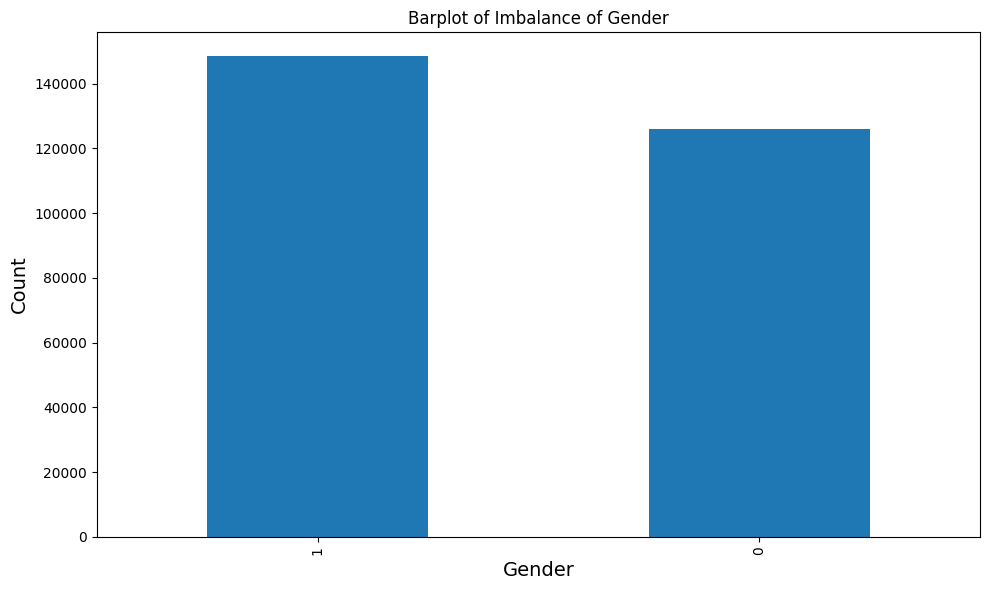

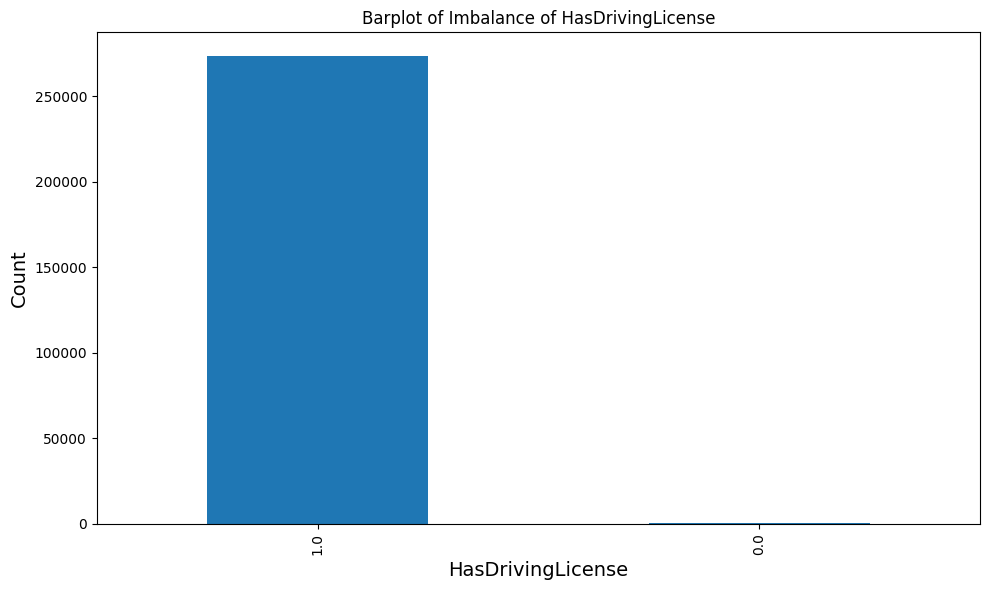

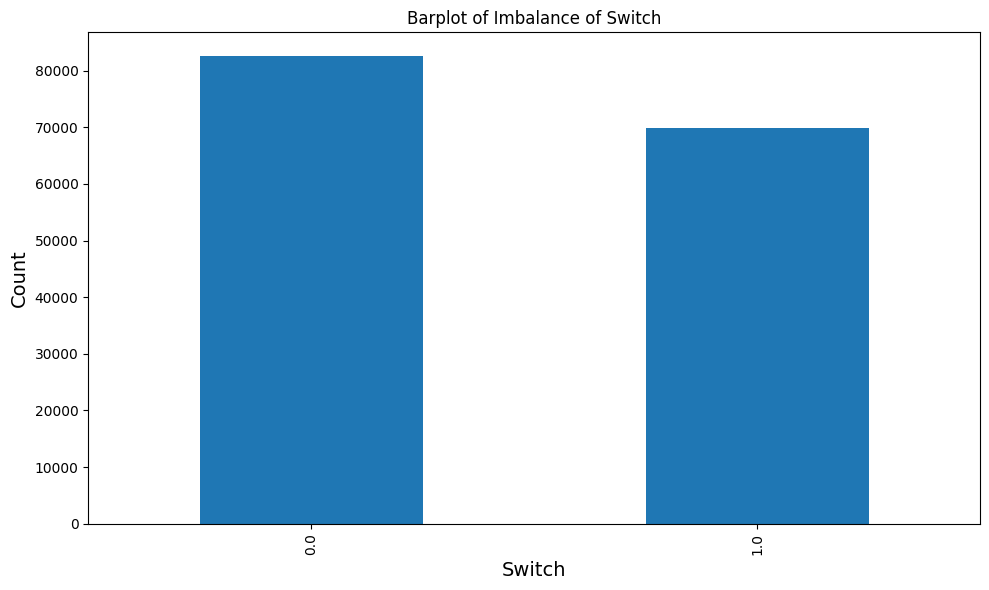

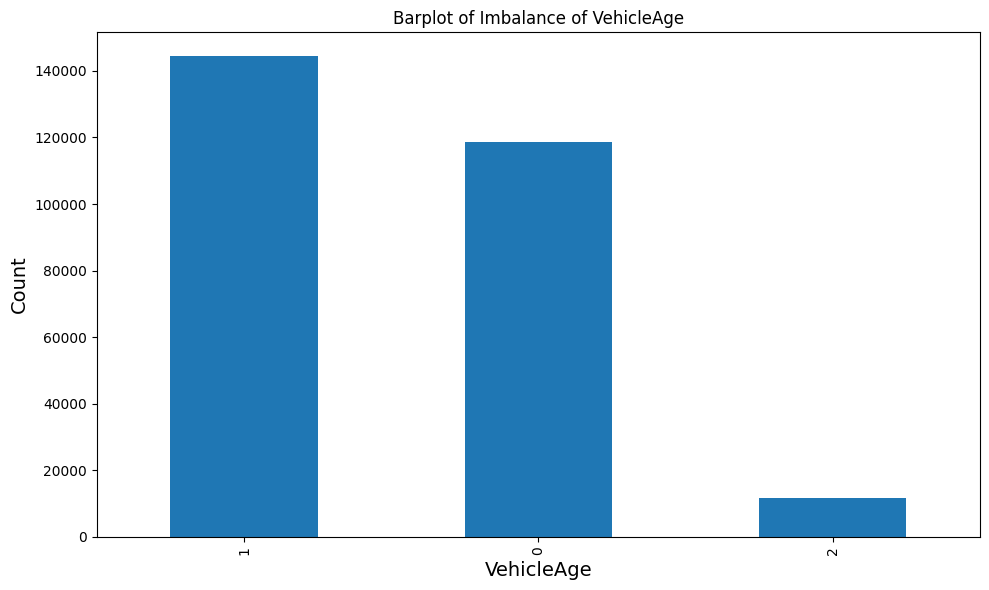

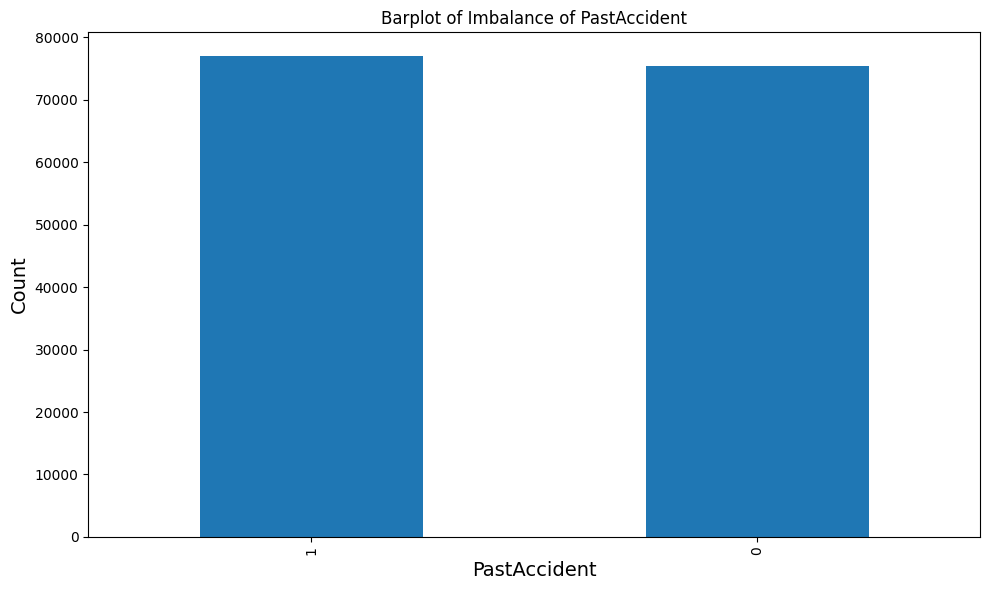

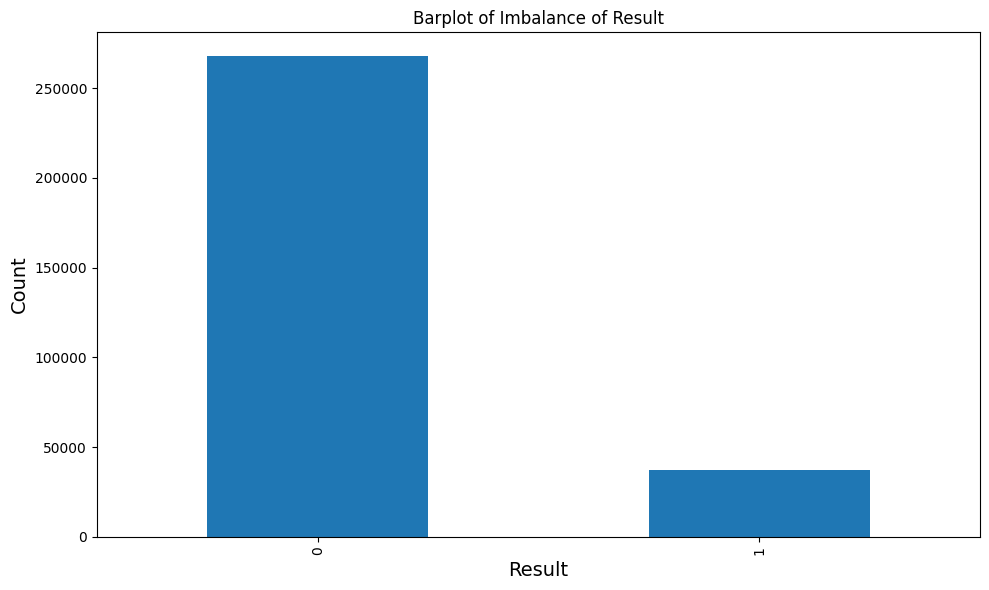

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Checking data imbalance by visualisation
columns = data[['Gender', 'HasDrivingLicense', 'Switch', 'VehicleAge', 'PastAccident', 'Result']]

# Create and show individual plots for each column
for column in columns:
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot(kind='bar', title=f'Barplot of Imbalance of {column}')
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.tight_layout()
    plt.show()


In [7]:
#checking for missing values
missingValues = data.isna().sum()

#print the number of missing values for each collumn
print("Missing Values: \n", missingValues)

Missing Values: 
 id                        0
Gender                30427
Age                   30548
HasDrivingLicense     30488
RegionID              30553
Switch               152330
VehicleAge            30441
PastAccident         152465
AnnualPremium             0
SalesChannelID            0
DaysSinceCreated          0
Result                    0
dtype: int64


In [8]:
#defining variable
x = data.drop('Result', 1)
y = data.Result

print(x)

print(y)

            id Gender   Age  HasDrivingLicense  RegionID  Switch VehicleAge  \
0       332804      0  39.0                1.0      15.0     0.0          1   
1       116249      1  38.0                1.0      11.0     NaN          1   
2       255006      1  22.0                1.0      30.0     NaN          0   
3       317475      0  23.0                1.0       NaN     NaN          0   
4       344213      1  56.0                1.0      48.0     0.0          2   
...        ...    ...   ...                ...       ...     ...        ...   
304882  259179      0  24.0                1.0      36.0     NaN        NaN   
304883  365839      1   NaN                1.0      35.0     NaN          1   
304884  131933      0  22.0                1.0       2.0     0.0          0   
304885  146868      1  44.0                1.0      32.0     NaN          1   
304886  121959      0  27.0                1.0      37.0     0.0          0   

       PastAccident  AnnualPremium  SalesChannelID 

<ipython-input-8-b02c11c74c5a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = data.drop('Result', 1)


In [9]:
# defining creating a historam
def plotHist(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='Outcome=0', color = 'red')
    plt.hist(list(x[y==1]), alpha=0.5, label='Outcome=1', color = 'blue')
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

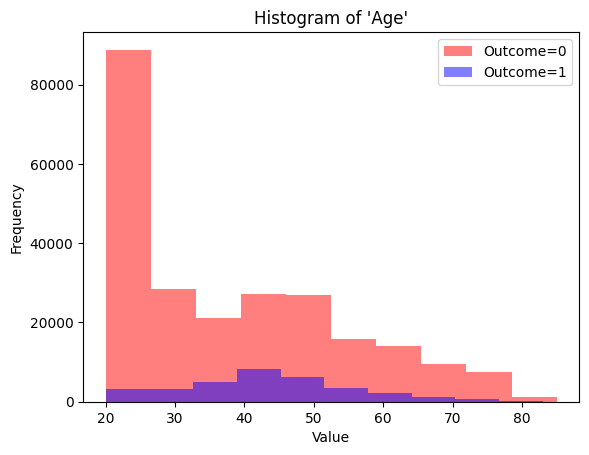

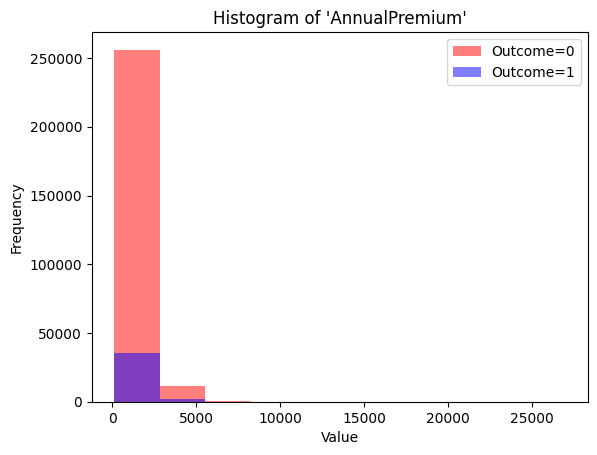

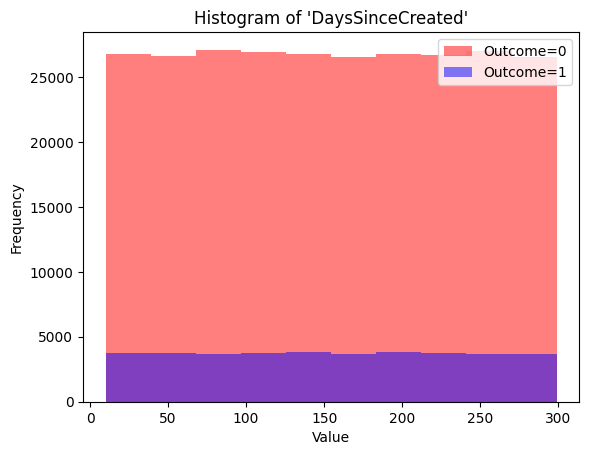

In [10]:
plotHist(data['Age'], y)
plotHist(data['AnnualPremium'], y)
plotHist(data['DaysSinceCreated'], y)

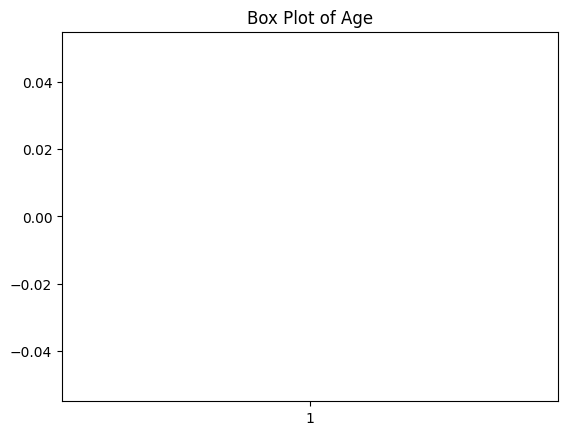

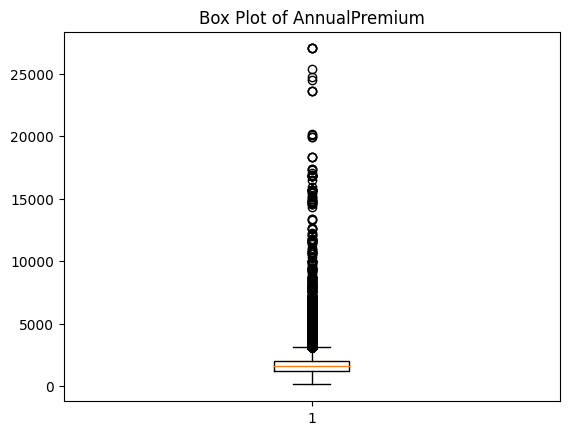

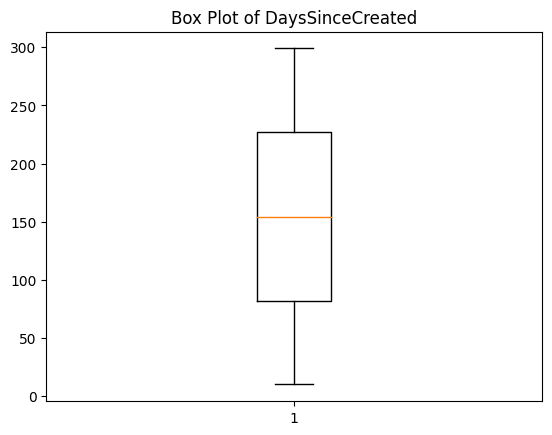

In [11]:
#boxplot of numercial features
datacolumns = data[['Age', 'AnnualPremium','DaysSinceCreated']]


# Create individual box plots for each column
for column in datacolumns:
    plt.figure()  # Create a new figure for each plot
    plt.boxplot(data[column])
    plt.title("Box Plot of " + column)
    plt.show()

<ipython-input-12-d918edee4e4d>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = heatmapEncoded.corr()


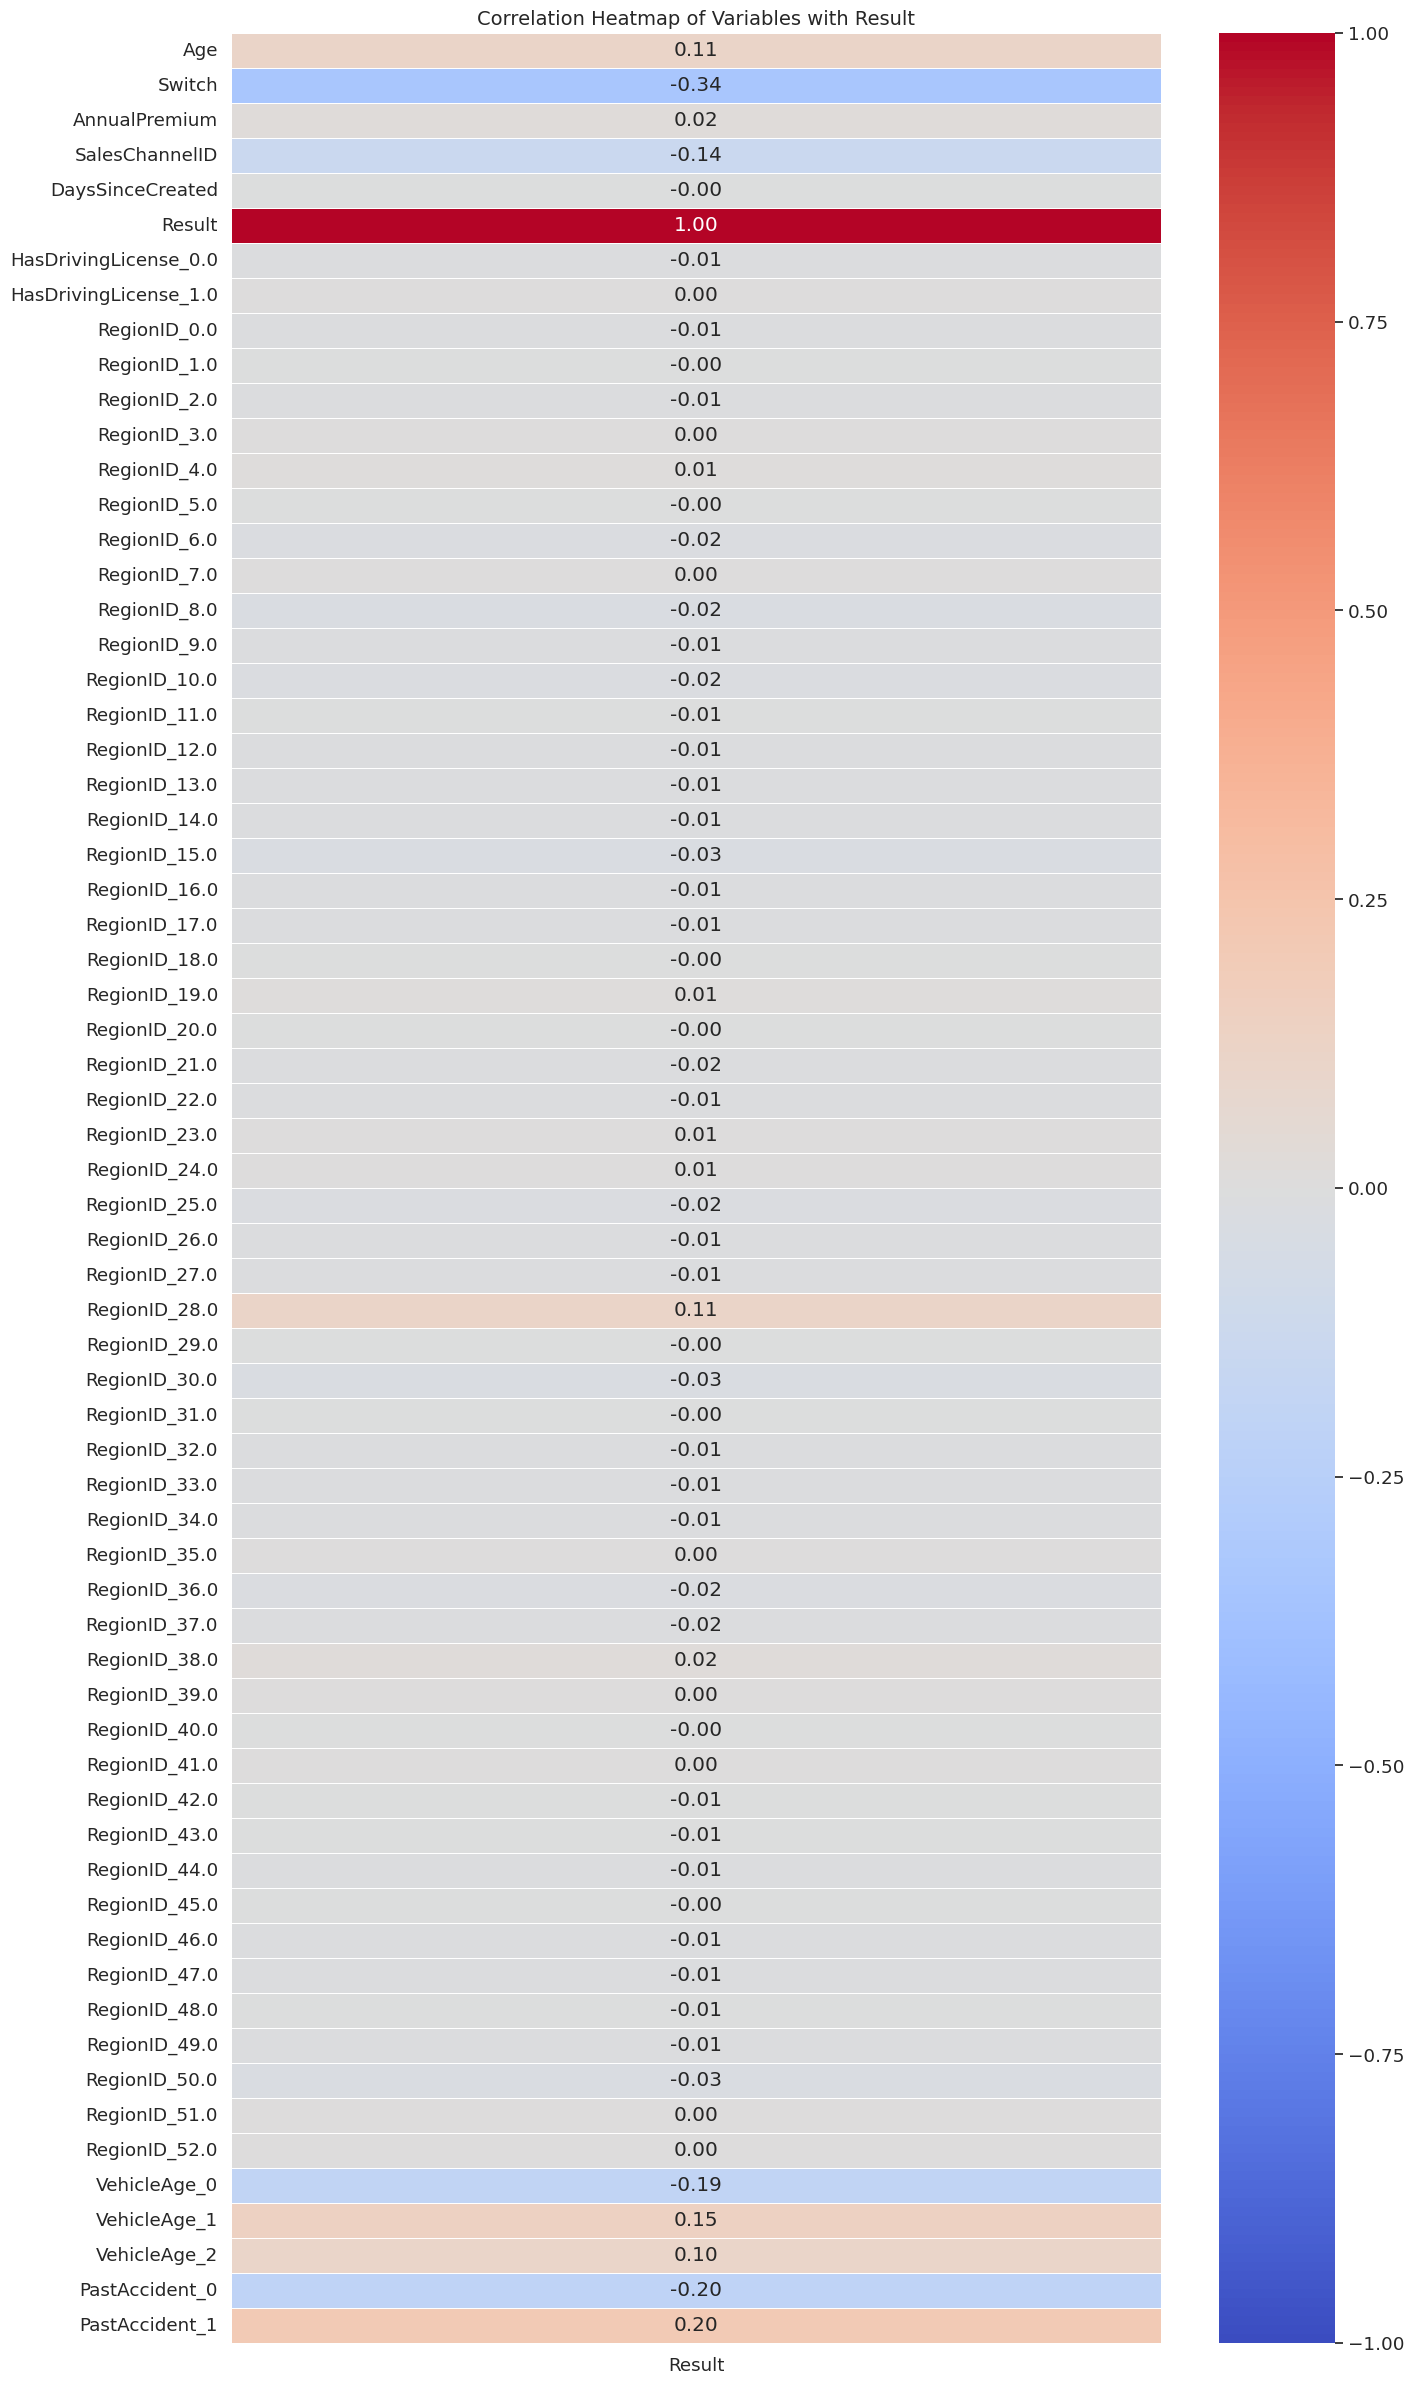

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#creating a heatmap to see correlation of x varibales against the y

#lisitng all features
features = ['Gender', 'Age', 'HasDrivingLicense', 'RegionID', 'Switch',
       'VehicleAge', 'PastAccident', 'AnnualPremium', 'SalesChannelID',
       'DaysSinceCreated', 'Result']

#defineing heatmap data
heatmapData = data[features]

# transforming categorical features
categoricals = ['HasDrivingLicense', 'RegionID', 'VehicleAge', 'PastAccident']
heatmapEncoded = pd.get_dummies(heatmapData, columns=categoricals)

#calculating the maxtrix
correlation_matrix = heatmapEncoded.corr()

# Creating heatmap plot
plt.figure(figsize=(15, 30))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix[['Result']], annot=True, fmt=".2f", cmap="coolwarm",
            vmin=-1, vmax=1, cbar=True, linewidths=.5)
plt.title('Correlation Heatmap of Variables with Result', fontsize=14)
plt.yticks(rotation=0)
plt.show()


##Augmentation

In [13]:
#removing id collumn as that is not relevant for this model.
try:
  data.drop(['id'], axis=1, inplace = True)
except KeyError:
  print('Attributes already removed')

#checking removal by printing data
print(data.head(10))

  Gender   Age  HasDrivingLicense  RegionID  Switch VehicleAge PastAccident  \
0      0  39.0                1.0      15.0     0.0          1          NaN   
1      1  38.0                1.0      11.0     NaN          1          NaN   
2      1  22.0                1.0      30.0     NaN          0          NaN   
3      0  23.0                1.0       NaN     NaN          0          NaN   
4      1  56.0                1.0      48.0     0.0          2          NaN   
5      1  30.0                1.0      18.0     NaN        NaN          NaN   
6    NaN  48.0                1.0      28.0     0.0          1            1   
7      1  20.0                1.0      37.0     0.0          0            1   
8      0  23.0                1.0      47.0     0.0          0            0   
9    NaN  77.0                1.0       NaN     1.0          1            0   

   AnnualPremium  SalesChannelID  DaysSinceCreated  Result  
0        2645.30              55               227       1  
1       

In [14]:
#replacing the missing values appropriately

# Replacing Has driving license null values with 0
data["HasDrivingLicense"].fillna("0", inplace=True)

#The Age is normal distribution therefore median used
median = data["Age"].median()
data["Age"].fillna(median, inplace=True)

#Replacing missing Values of RegionID to -1 for unknown
data["RegionID"].fillna(-1, inplace=True)

#Replacing missing Values of VehicleAge to unknown
data["VehicleAge"].fillna(-1, inplace=True)

#replacing missing Values of Gender to unknown
data["Gender"].fillna(-1, inplace=True)

#Replacing missing Values of VehicleAge to unknown
data["Switch"].fillna(2, inplace=True)

#replacing missing Values of Gender to unknown
data["PastAccident"].fillna(2, inplace=True)

print('After filling all missing values \n', data.isna().sum())

After filling all missing values 
 Gender               0
Age                  0
HasDrivingLicense    0
RegionID             0
Switch               0
VehicleAge           0
PastAccident         0
AnnualPremium        0
SalesChannelID       0
DaysSinceCreated     0
Result               0
dtype: int64


In [15]:
'''# alternatively remove all data entries with n/a values.
data = data.dropna()
print('After dropping entries containing N/A: \n', data.isna().sum())'''

"# alternatively remove all data entries with n/a values.\ndata = data.dropna()\nprint('After dropping entries containing N/A: \n', data.isna().sum())"

In [16]:
# finding outliers that are outside IQR * 1.25

def findOutliners(x):
    lowerPercentile = np.percentile(x, 25)
    upperPercentile = np.percentile(x, 75)
    interRange = upperPercentile-lowerPercentile
    lower = lowerPercentile - 1.25*interRange
    upper = upperPercentile + 1.25*interRange
    outlierPositions = list(x.index[(x < lower)|(x > upper)])
    outlierValues = list(x[outlierPositions])

    return outlierPositions, outlierValues

In [17]:
#finding positions and values of outliers for each numerical category
outlierPositions, outlierValues = findOutliners(data['Age'])
print('Age: ', len(np.sort(outlierValues)))

outlierPositions, outlierValues = findOutliners(data['AnnualPremium'])
print('AnnualPremium: ', len(np.sort(outlierValues)))

outlierPositions, outlierValues = findOutliners(data['DaysSinceCreated'])
print('DaysSinceCreated: ', len(np.sort(outlierValues)))

Age:  3237
AnnualPremium:  63548
DaysSinceCreated:  0


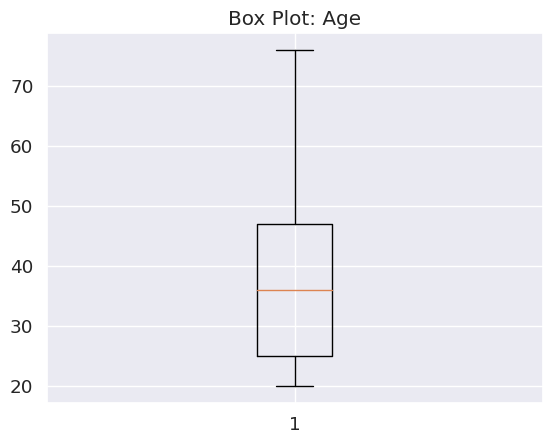

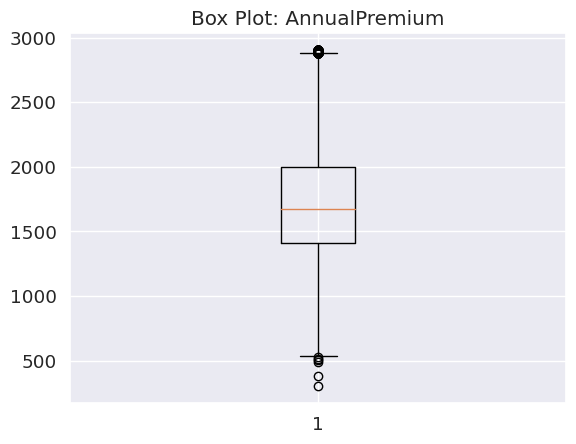

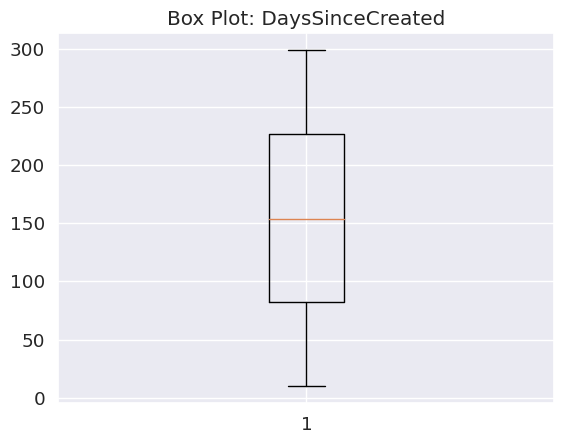

In [18]:
#droppin outliers of AnnualPremium
outlierPositions, outlierValues = findOutliners(data['Age'])
data.drop(outlierPositions, inplace = True)

#droppin outliers of AnnualPremium
outlierPositions, outlierValues = findOutliners(data['AnnualPremium'])
data.drop(outlierPositions, inplace = True)



# Boxplot after removing outliers
for column in datacolumns:
    plt.figure()  # Create a new figure for each plot
    plt.boxplot(data[column])
    plt.title("Box Plot: " + column)
    plt.show()

In [19]:
# dropping features that do that have a strong correlation with the y variable
try:
  data.drop(['RegionID'], axis=1, inplace = True)
except KeyError:
  print('Attributes already removed')

try:
  data.drop(['HasDrivingLicense'], axis=1, inplace = True)
except KeyError:
  print('Attributes already removed')

try:
  data.drop(['DaysSinceCreated'], axis=1, inplace = True)
except KeyError:
  print('Attributes already removed')

try:
  data.drop(['AnnualPremium'], axis=1, inplace = True)
except KeyError:
  print('Attributes already removed')


In [20]:
#redefining x and y variables

x = data.drop('Result', 1)
y = data.Result

print(x)

print(y)


       Gender   Age  Switch VehicleAge PastAccident  SalesChannelID
0           0  39.0     0.0          1            2              55
1           1  38.0     2.0          1            2              26
2           1  22.0     2.0          0            2             152
3           0  23.0     2.0          0            2             151
5           1  30.0     2.0         -1            2             152
...       ...   ...     ...        ...          ...             ...
304880      0  23.0     2.0          0            0             152
304882      0  24.0     2.0         -1            0             152
304883      1  36.0     2.0          1            2             124
304884      0  22.0     0.0          0            2             152
304886      0  27.0     0.0          0            2             152

[238773 rows x 6 columns]
0         1
1         0
2         0
3         0
5         0
         ..
304880    0
304882    0
304883    0
304884    0
304886    1
Name: Result, Length: 238

<ipython-input-20-2707796d24f0>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = data.drop('Result', 1)


In [21]:
#splitting data to testing and trainning data
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

XTrain, XTest, yTrain, yTest = train_test_split(x, y, test_size=0.25)

# Separate the majority and minority classes
majorityClass = data[data['Result'] == 0]
minorityClass = data[data['Result'] == 1]


#undersampling to deal with imbalanced data for results
undersampled_majority = resample(majorityClass, replace=False, n_samples=len(minorityClass))

# Combine the undersampled majority class and the minority class to create the balanced training set
balancedData = pd.concat([undersampled_majority, minorityClass])

# balanced data is shuffled
balancedTrain = balancedData.sample(frac=1)

# separating the x and y variables in the trainning data
XTrain = balancedTrain.drop('Result', axis=1)
yTrain = balancedTrain['Result']



#Model Implementation

In [22]:
#XGBOOST
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier



# Defining the XGBoost model
xgb_model = xgb.XGBClassifier()

# Defining the parameters to be used for random search
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# combining data for one hot encoding
combinedData = pd.concat([XTrain, XTest], axis=0)

# One hot encoding for categorical data
combinedDataEncoded = pd.get_dummies(combinedData, columns=["Gender", "Switch", "VehicleAge", "PastAccident", "SalesChannelID"])

# Split the data back into X and Y trainnings
XTrainEncoded = combinedDataEncoded[:len(XTrain)]
XTestEncoded = combinedDataEncoded[len(XTrain):]

# hyperparameter tuning using randomSearch
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=5, scoring='precision', cv=5, verbose=1)
random_search.fit(XTrainEncoded, yTrain)

#Retive best model
best_xgb_model = random_search.best_estimator_

#Wrap with bagging classifier
bagging_model = BaggingClassifier(estimator=best_xgb_model, n_estimators=10, random_state=42)

#Fit bagging model to trainning
bagging_model.fit(XTrainEncoded, yTrain)

#Make predictions
yPredictions = bagging_model.predict(XTestEncoded)

# Evaluate the model
accuracy = accuracy_score(yTest, yPredictions)
precision = precision_score(yTest, yPredictions)
recall = recall_score(yTest, yPredictions)
f1 = f1_score(yTest, yPredictions)
roc_auc = roc_auc_score(yTest, yPredictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", roc_auc)

# Save the best model checkpoint
checkpoint_path = "xgboost_checkpoint.model"
best_xgb_model.save_model(checkpoint_path)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.6860153449257882
Precision: 0.2633440383755437
Recall: 0.9123943661971831
F1-score: 0.40871951796586636
AUC-ROC: 0.7839246805317589


In [23]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
import joblib

# Defining the Random Forest model
rf_base_model = RandomForestClassifier()

# Create a BaggingClassifier with the Random Forest model as the base estimator
bagging_model = BaggingClassifier(estimator=rf_base_model, n_estimators=10, random_state=42)

# Defining the parameters to be used for random search
param_dist = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [None, 5, 10, 20],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
}

# hyperparameter tuning using randomSearch
random_search = RandomizedSearchCV(bagging_model, param_distributions=param_dist, n_iter=5, scoring='precision', cv=5)
random_search.fit(XTrain, yTrain)

# Retrieve best model
best_bagging_model = random_search.best_estimator_

# Make predictions
yPredictions = best_bagging_model.predict(XTest)

# Evaluate the model
accuracy = accuracy_score(yTest, yPredictions)
precision = precision_score(yTest, yPredictions)
recall = recall_score(yTest, yPredictions)
f1 = f1_score(yTest, yPredictions)
roc_auc = roc_auc_score(yTest, yPredictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", roc_auc)

# Save the best model checkpoint
checkpoint_path = "Bagging_RF_model.joblib"
joblib.dump(best_bagging_model, checkpoint_path)


Accuracy: 0.6950782323181559
Precision: 0.2686312104034678
Recall: 0.9077464788732394
F1-score: 0.41457609674514345
AUC-ROC: 0.7870576330936908


['Bagging_RF_model.joblib']

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import joblib

# Defining the regression model
logistic_model = LogisticRegression()

# Defining the parameters to be used for random search
param_dist = {
   'base_estimator__penalty': ['l2'],
    'base_estimator__C': [0.1, 1, 10, 100],
    'base_estimator__solver': ['liblinear', 'lbfgs', 'saga'],
    'base_estimator__max_iter': [500, 1000, 1200],
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 0.9],
    'bootstrap': [True, False]
}

# Create a BaggingClassifier with the Logistic Regression model as the base estimator
bagging_model = BaggingClassifier(base_estimator=logistic_model, n_estimators=10, random_state=42)

# hyperparameter tuning using randomSearch
random_search = RandomizedSearchCV(bagging_model, param_distributions=param_dist, n_iter=5, scoring='precision', cv=5)
random_search.fit(XTrain, yTrain)

# Retrieve best model
best_bagging_model = random_search.best_estimator_

# Make predictions
yPredictions = best_bagging_model.predict(XTest)

# Evaluate the model
accuracy = accuracy_score(yTest, yPredictions)
precision = precision_score(yTest, yPredictions)
recall = recall_score(yTest, yPredictions)
f1 = f1_score(yTest, yPredictions)
roc_auc = roc_auc_score(yTest, yPredictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", roc_auc)

# Save the best model checkpoint
checkpoint_path = "bagging_logistic_regression_model.joblib"
joblib.dump(best_bagging_model, checkpoint_path)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Accuracy: 0.650902938318759
Precision: 0.20761864226431156
Recall: 0.6870422535211268
F1-score: 0.3188756332734107
AUC-ROC: 0.6665332574218555


['bagging_logistic_regression_model.joblib']

In [33]:
from sklearn.ensemble import VotingClassifier

# Loading the saved models
best_xgb_model = xgb.XGBClassifier()
best_xgb_model.load_model("xgboost_checkpoint.model")

best_rf_model = joblib.load("Bagging_RF_model.joblib")

best_logistic_model = joblib.load("bagging_logistic_regression_model.joblib")

# Creating the ensemble model
ensemble_models = [
    ('XGBoost', best_xgb_model),
    ('RandomForest', best_rf_model),
    ('LogisticRegression', best_logistic_model),
]

# Defining VotingClassifier
votingClassifiers = VotingClassifier(estimators=ensemble_models, voting='soft')

# Fit the ensemble model
votingClassifiers.fit(XTrainEncoded, yTrain)

# Making predictions using the ensemble
ensemblePredictions = votingClassifiers.predict(XTestEncoded)

# Evaluating the ensemble model
ensemble_accuracy = accuracy_score(yTest, ensemblePredictions)
ensemble_precision = precision_score(yTest, ensemblePredictions)
ensemble_recall = recall_score(yTest, ensemblePredictions)
ensemble_f1 = f1_score(yTest, ensemblePredictions)
ensemble_roc_auc = roc_auc_score(yTest, ensemblePredictions)

print("Ensemble Accuracy:", ensemble_accuracy)
print("Ensemble Precision:", ensemble_precision)
print("Ensemble Recall:", ensemble_recall)
print("Ensemble F1-score:", ensemble_f1)
print("Ensemble AUC-ROC:", ensemble_roc_auc)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Ensemble Accuracy: 0.6915435387141087
Ensemble Precision: 0.2656308266003729
Ensemble Recall: 0.9029577464788733
Ensemble F1-score: 0.4105010404994397
Ensemble AUC-ROC: 0.7829805654476732


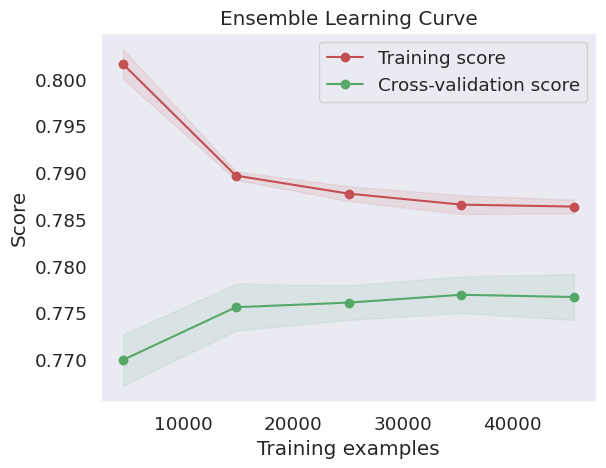

In [34]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Creating a learning curve plot to analyze overfitting/underfitting
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Define the ensemble model again
votingClassifiers = VotingClassifier(estimators=ensemble_models, voting='soft')

# Ploting the learning curve to analyze overfitting/underfitting
plot_learning_curve(votingClassifiers, "Ensemble Learning Curve", XTrainEncoded, yTrain, cv=5, n_jobs=-1)

plt.show()

In [ ]:
'''import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import BaggingClassifier


# Defining the SVM model
svm_model = SVC()

# Defining the parameters to be used for random search
param_dist = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 0.01, 0.001],
}

# combining data for one hot encoding
combinedData = pd.concat([XTrain, XTest], axis=0)

# One hot encoding for categorical data
combinedDataEncoded = pd.get_dummies(combinedData, columns=["Gender", "Switch", "VehicleAge", "PastAccident", "SalesChannelID"])

# Split the data back into X and Y trainnings
XTrainEncoded = combinedDataEncoded[:len(XTrain)]
XTestEncoded = combinedDataEncoded[len(XTrain):]

# hyperparameter tuning using randomSearch
random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=5, scoring='precision', cv=5, verbose=1)
random_search.fit(XTrainEncoded, yTrain)

#Retive best model
best_svm_model = random_search.best_estimator_

#Wrap with bagging classifier
bagging_model = BaggingClassifier(base_estimator=best_svm_model, n_estimators=10, random_state=42)

#Fit bagging model to trainning
bagging_model.fit(XTrainEncoded, yTrain)

#Make predictions
yPredictions = bagging_model.predict(XTestEncoded)

# Evaluate the model
accuracy = accuracy_score(yTest, yPredictions)
precision = precision_score(yTest, yPredictions)
recall = recall_score(yTest, yPredictions)
f1 = f1_score(yTest, yPredictions)
roc_auc = roc_auc_score(yTest, yPredictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", roc_auc)

# Save the best model checkpoint
import joblib
checkpoint_path = "svm_checkpoint.model"
joblib.dump(best_svm_model, checkpoint_path)
'''
